# Phase 1 - EDA

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Timestamp,Account_Balance,Device_Type,Location,Merchant_Category,IP_Address_Flag,...,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Type,Card_Age,Transaction_Distance,Authentication_Method,Risk_Score,Is_Weekend,Fraud_Label
count,50000,50000,50000.000000,50000,50000,50000.000000,50000,50000,50000,50000.00000,...,50000.000000,50000.000000,50000.000000,50000,50000.000000,50000.000000,50000,50000.000000,50000.000000,50000.000000
unique,50000,8963,NaN,4,NaN,NaN,3,5,5,NaN,...,NaN,NaN,NaN,4,NaN,NaN,4,NaN,NaN,NaN
top,TXN_15795,USER_9998,NaN,POS,NaN,NaN,Tablet,Tokyo,Clothing,NaN,...,NaN,NaN,NaN,Mastercard,NaN,NaN,Biometric,NaN,NaN,NaN
freq,1,16,NaN,12549,NaN,NaN,16779,10208,10033,NaN,...,NaN,NaN,NaN,12693,NaN,NaN,12591,NaN,NaN,NaN
mean,NaN,NaN,99.411012,NaN,2023-07-02 12:47:11.063999744,50294.065981,NaN,NaN,NaN,0.05020,...,7.485240,255.271924,2.003540,NaN,119.999940,2499.164155,NaN,0.501556,0.299640,0.321340
min,NaN,NaN,0.000000,NaN,2023-01-01 00:01:00,500.480000,NaN,NaN,NaN,0.00000,...,1.000000,10.000000,0.000000,NaN,1.000000,0.250000,NaN,0.000100,0.000000,0.000000
25%,NaN,NaN,28.677500,NaN,2023-04-02 03:35:30,25355.995000,NaN,NaN,NaN,0.00000,...,4.000000,132.087500,1.000000,NaN,60.000000,1256.497500,NaN,0.254000,0.000000,0.000000
50%,NaN,NaN,69.660000,NaN,2023-07-02 14:00:00,50384.430000,NaN,NaN,NaN,0.00000,...,7.000000,256.085000,2.000000,NaN,120.000000,2490.785000,NaN,0.502250,0.000000,0.000000
75%,NaN,NaN,138.852500,NaN,2023-10-01 07:13:00,75115.135000,NaN,NaN,NaN,0.00000,...,11.000000,378.032500,3.000000,NaN,180.000000,3746.395000,NaN,0.749525,1.000000,1.000000
max,NaN,NaN,1174.140000,NaN,2023-12-31 23:50:00,99998.310000,NaN,NaN,NaN,1.00000,...,14.000000,500.000000,4.000000,NaN,239.000000,4999.930000,NaN,1.000000,1.000000,1.000000



Missing Values:
Transaction_ID                  0
User_ID                         0
Transaction_Amount              0
Transaction_Type                0
Timestamp                       0
Account_Balance                 0
Device_Type                     0
Location                        0
Merchant_Category               0
IP_Address_Flag                 0
Previous_Fraudulent_Activity    0
Daily_Transaction_Count         0
Avg_Transaction_Amount_7d       0
Failed_Transaction_Count_7d     0
Card_Type                       0
Card_Age                        0
Transaction_Distance            0
Authentication_Method           0
Risk_Score                      0
Is_Weekend                      0
Fraud_Label                     0
dtype: int64

Duplicate Records: 0


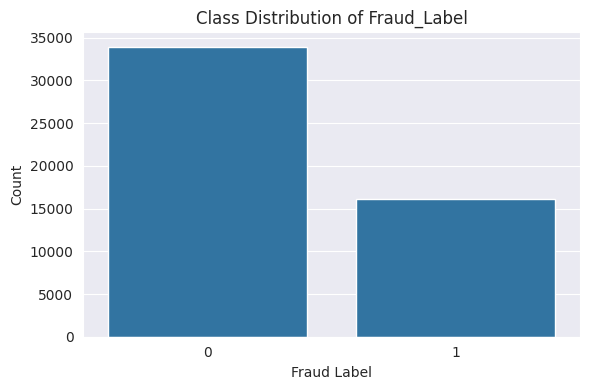

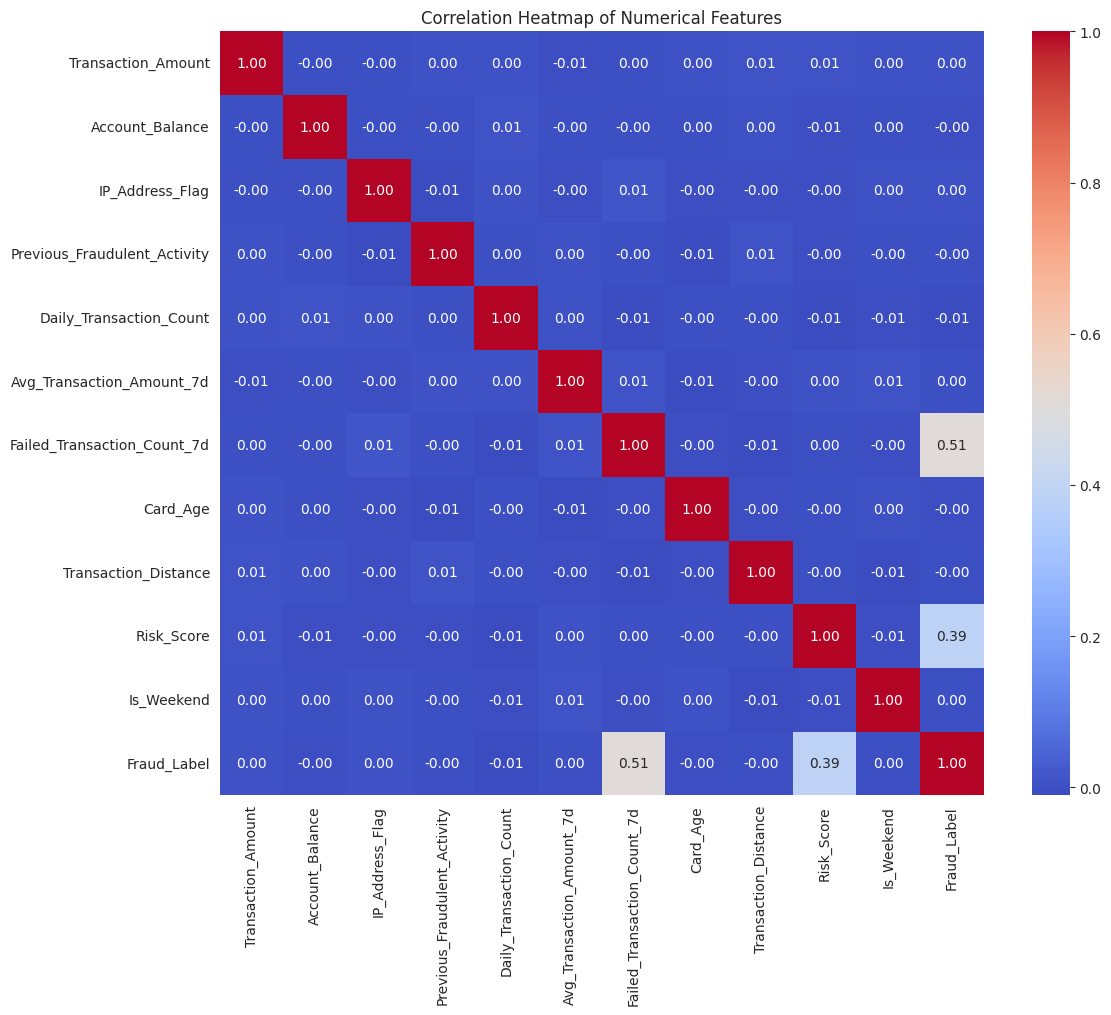


Skewness:
Transaction_Amount              1.996036
Account_Balance                -0.003025
IP_Address_Flag                 4.119975
Previous_Fraudulent_Activity    2.696697
Daily_Transaction_Count         0.003684
Avg_Transaction_Amount_7d      -0.000909
Failed_Transaction_Count_7d    -0.008803
Card_Age                        0.000512
Transaction_Distance            0.006449
Risk_Score                     -0.001319
Is_Weekend                      0.874769
Fraud_Label                     0.765177
dtype: float64

Kurtosis:
Transaction_Amount               6.129340
Account_Balance                 -1.201360
IP_Address_Flag                 14.974789
Previous_Fraudulent_Activity     5.272388
Daily_Transaction_Count         -1.221263
Avg_Transaction_Amount_7d       -1.199194
Failed_Transaction_Count_7d     -1.302061
Card_Age                        -1.201927
Transaction_Distance            -1.193328
Risk_Score                      -1.192591
Is_Weekend                      -1.234828
Fraud_Lab

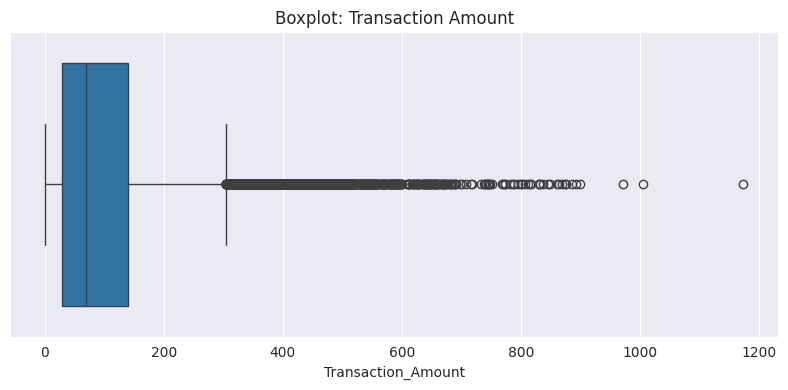

In [14]:
# 📦 Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 🧾 Load Dataset
df = pd.read_csv("synthetic_fraud_dataset.csv")  # Adjust path if needed

df['Timestamp'] = pd.to_datetime(df['Timestamp'])  # Convert timestamp to datetime

# 📊 Summary Statistics
summary_stats = df.describe(include='all')
display(summary_stats)

# 🔍 Check for Missing Values
print("\nMissing Values:")
print(df.isnull().sum())

# 🧬 Check for Duplicates
duplicate_count = df.duplicated().sum()
print(f"\nDuplicate Records: {duplicate_count}")

# ⚖️ Class Distribution Plot
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Fraud_Label')
plt.title('Class Distribution of Fraud_Label')
plt.xlabel('Fraud Label')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# 📉 Correlation Heatmap
corr_matrix = df.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

# 📦 Skewness & Kurtosis
print("\nSkewness:")
print(df.select_dtypes(include=[np.number]).skew())

print("\nKurtosis:")
print(df.select_dtypes(include=[np.number]).kurtosis())

# 📦 Boxplot for Outlier Detection (optional example)
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='Transaction_Amount')
plt.title('Boxplot: Transaction Amount')
plt.tight_layout()
plt.show()